In [1]:

%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts

In [2]:
def print_results(counts):
    # Extract the most frequent measurement (the best estimate of theta)
    most_frequent_output = max(counts, key=counts.get)
    total = sum([v for v in counts_r.values()])
    # Convert the binary string to a fraction
    binary_fraction = int(most_frequent_output, 2) / (2 ** len(most_frequent_output))

    # Theta is the binary fraction
    estimated_theta = binary_fraction

    print(f"Measured output: {most_frequent_output}")
    print(f"Estimated theta: {estimated_theta}")
    print(f"With probability: {counts[most_frequent_output]/total}", )
    
def classical_reverse(counts):
    reversed_counts = {}
    for k,v in counts.items():
        reversed_counts[k[::-1]]=v
    return reversed_counts

In [3]:
N = 5
angle = 0.1

# N is the number of subcircuits
# Each circuit has 1+1 qubits

qc = QuantumCircuit(2*N,N)

for i in range(N):
    start = 2*i
    
    qc.h(start)
    qc.x(start+1)
    # Controlled unitary
    
    qc.crz(angle*2*np.pi*2**(N-i),start,start+1)
    
    for j in range(i-1,-1,-1):
        qc.rz(-np.pi*2**(-j-1),start).c_if(i-j-1,1)
    
    qc.h(start)
    qc.measure(start,i)
#     qc.barrier()
    

## Each circuit sends their measurements to the following ones, each circuit receives from the previous ones.

## Or, it could use some central scheduler?? 

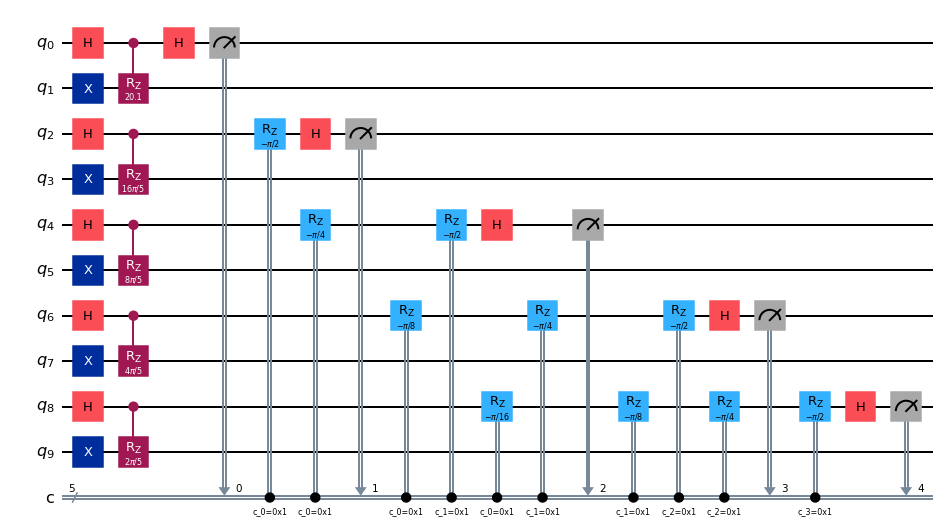

In [4]:
qc.draw('mpl')

In [6]:
backend = AerSimulator()
counts = backend.run(qc, shots = 1000).result().get_counts()

counts_r = classical_reverse(counts)



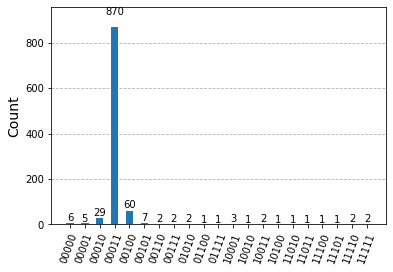

In [7]:
plot_histogram(counts)

In [8]:
print_results(counts)

Measured output: 00011
Estimated theta: 0.09375
With probability: 0.87


## Alternative way, where instead of using Rz(angle 2^x), we apply x times Rz(angle). Depth becomes tricky!! 

In [13]:
N = 5
angle = 0.1

# N is the number of subcircuits
# Each circuit has 1+1 qubits

qc2 = QuantumCircuit(2*N,N)

for i in range(N):
    start = 2*i
    
    qc2.h(start)
    qc2.x(start+1)
    # Controlled unitary
    for k in range(2**(N-i-1)):
        qc2.crz(4*angle*np.pi,start,start+1)
    
    for j in range(i-1,-1,-1):
        qc2.rz(-np.pi*2**(-j-1),start).c_if(i-j-1,1)
    
    qc2.h(start)
    qc2.measure(start,i)
#     qc.barrier()
    

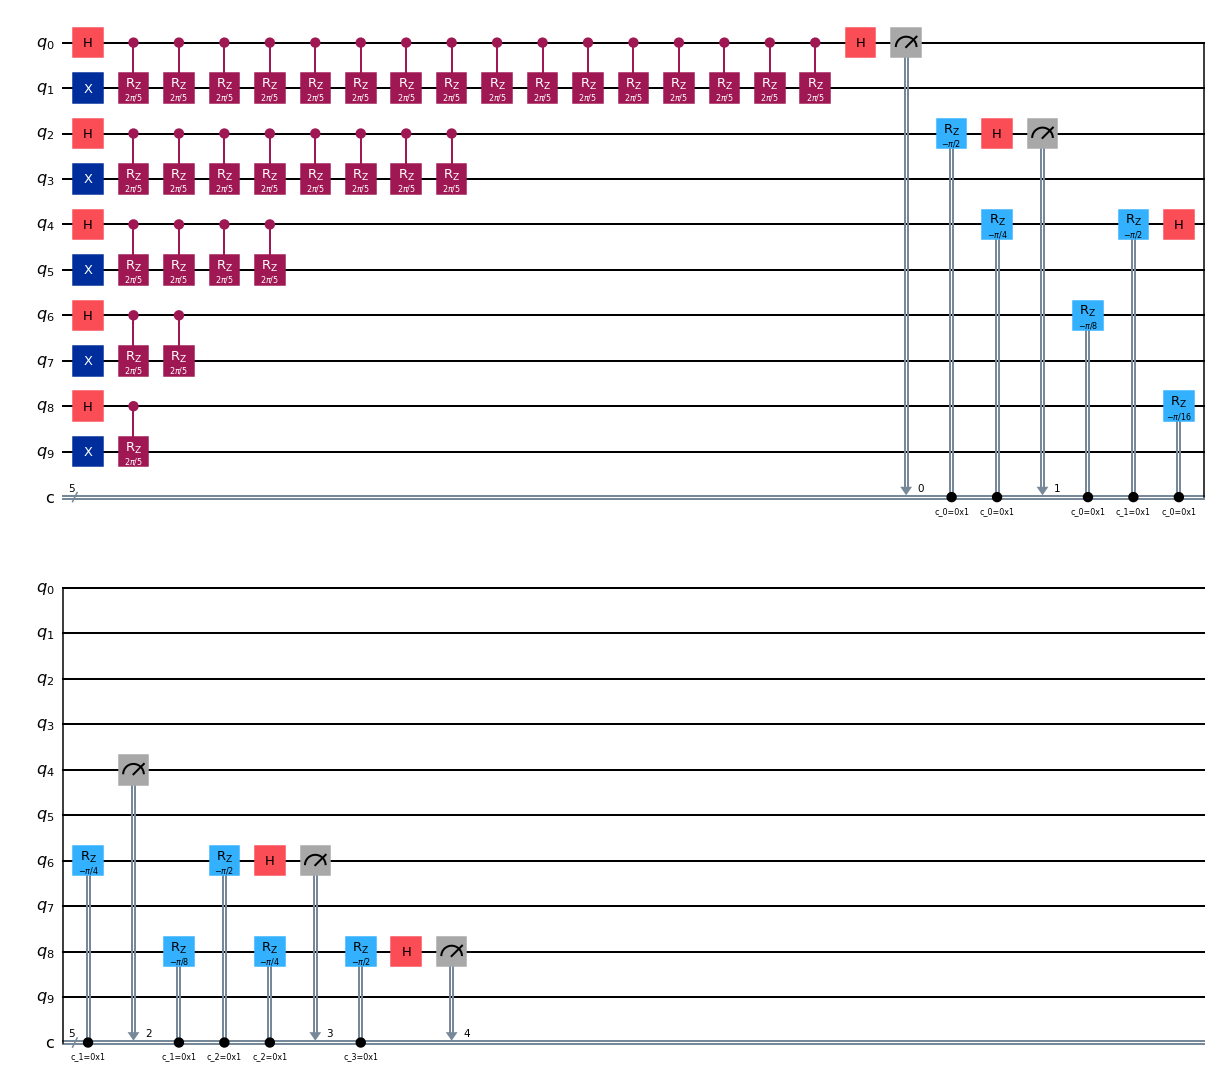

In [14]:
qc2.draw('mpl')

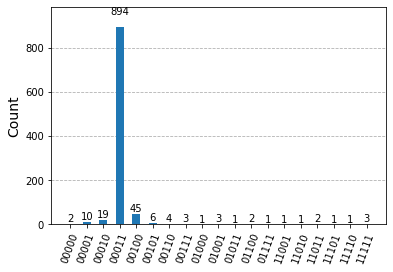

In [15]:
backend = AerSimulator()
counts2 = backend.run(qc2, shots = 1000).result().get_counts()

counts2_r = classical_reverse(counts)
plot_histogram(counts2)


In [12]:
print_results(counts2)

Measured output: 00011
Estimated theta: 0.09375
With probability: 0.891
